# Bağımlı İki Örneklem T Testi
* Bağımlı iki gurup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

### Hipotzeler:
* $H_0: \mu_o = \mu_s$
* $H_1: \mu_o \neq \mu_s$

-------------------
* $H_0: \mu_o <= \mu_s$
* $H_1: \mu_o > \mu_s$
----------------
* $H_0: \mu_o >= \mu_s$
* $H_1: \mu_o < \mu_s$
---------------------
### $t = \frac{\bar{x}_D - \mu_0}{\frac{S_D}{\sqrt{n}}}$
-----------------------------------
### Varsayımlar:
* Normallik
* Varyans Homojenliği 

## İş uygulaması: Şirket içi Eğitimin Performans Etkisi Ölçümü
### Problem: Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.
### Detaylar :
* Bir departman bir konuda eğitim talep ediyor.
* Gerekli/Gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
* Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

* $H_0: \mu_o = \mu_s$
* $H_1: \mu_o \neq \mu_s$

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
oncesi = pd.DataFrame([123, 119, 116, 123, 123, 121, 120, 117, 118, 121, 121, 123, 119,
121, 118, 124, 121, 125, 115, 115, 119, 118, 121, 117, 117, 120, 120,
121, 117, 118, 117, 123, 118, 124, 121, 115, 118, 125, 115])
sonrasi = pd.DataFrame([118, 127, 122,
129, 123, 129, 132, 128, 130, 128, 138, 140, 130,
134, 134, 124, 140, 134, 129, 129, 138, 134, 124, 122, 126, 133, 127,
130, 130, 130, 132, 117, 130, 125, 129, 133, 120,127,123])

In [41]:
sonrasi.describe().T

,count,mean,std,min,25%,50%,75%,max
0,39.0,128.923077,5.536409,117.0,125.5,129.0,132.5,140.0


In [42]:
oncesi.describe().T

,count,mean,std,min,25%,50%,75%,max
0,39.0,119.666667,2.895853,115.0,117.5,120.0,121.0,125.0


In [43]:
# Birinci veri seti
AYRIK = pd.concat([oncesi,sonrasi], axis = 1 )

In [44]:
AYRIK.columns = ['ONCESI','SONRASI']
AYRIK.head()

,ONCESI,SONRASI
0,123,118
1,119,127
2,116,122
3,123,129
4,123,123


In [45]:
# İkinci veri seti
# Öncesi Flag/Tag'ını oluşturma
GRUP_ONCESI= np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] ='ONCESI'

In [46]:
# Flag ve öncesi değerlerini bir araya getirme
A= pd.concat([oncesi,GRUP_ONCESI],axis=1)

In [47]:
# SONRASI FLAG/TAG oluşturma
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI= pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:]='SONRASI'

In [48]:
GRUP_SONRASI

,0
0,SONRASI
1,SONRASI
2,SONRASI
3,SONRASI
4,SONRASI
5,SONRASI
6,SONRASI
7,SONRASI
8,SONRASI
9,SONRASI


In [49]:
#Flag ve SONRASI değerlerini bir araya getirme
B = pd.concat([sonrasi,GRUP_SONRASI], axis=1)

In [50]:
#Tüm veriyi bir araya getirme
BIRLIKTE = pd.concat([A,B])

In [51]:
BIRLIKTE

,0,0
0,123,ONCESI
1,119,ONCESI
2,116,ONCESI
3,123,ONCESI
4,123,ONCESI
...,...,...
34,129,SONRASI
35,133,SONRASI
36,120,SONRASI
37,127,SONRASI


In [52]:
## İsimlendirme
BIRLIKTE.columns = ["PERFORMANS", "ONCESI_SONRASI"]

In [53]:
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), '\n')

'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         116         ONCESI
3         123         ONCESI
4         123         ONCESI 



In [54]:
AYRIK

,ONCESI,SONRASI
0,123,118
1,119,127
2,116,122
3,123,129
4,123,123
5,121,129
6,120,132
7,117,128
8,118,130
9,121,128


<Axes: xlabel='ONCESI_SONRASI', ylabel='PERFORMANS'>

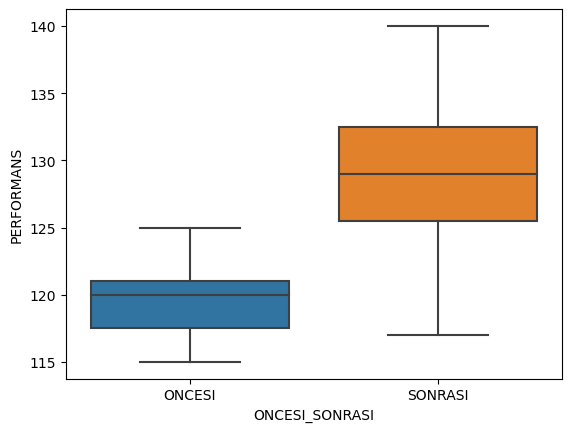

In [55]:
sns.boxplot(x= 'ONCESI_SONRASI', y='PERFORMANS', data=BIRLIKTE)

## Varsayım kontrolleri; Bağımlı iki örneklem t testinin varsayımları
* normallik(çok benzer olması da yeterli)
* varyans homojenliği

In [56]:
from scipy.stats import shapiro

In [57]:
shapiro(AYRIK.ONCESI) ## p-val 0.05 den küşçük değil, H0 hipotezi red edilemiyor, yani dağılım normal.

ShapiroResult(statistic=0.951807975769043, pvalue=0.09455567598342896)

In [59]:
shapiro(AYRIK.SONRASI) ## p-val 0.05 den küşçük değil, H0 hipotezi red edilemiyor, yani dağılım normal.

ShapiroResult(statistic=0.9776681065559387, pvalue=0.6190539598464966)

In [62]:
import scipy.stats as stats

In [63]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI) ## Homojen değil ancak bunu göz ardı ederek testi gerçekleştiriyoruz.

LeveneResult(statistic=7.831000980479548, pvalue=0.006504959866829767)

## Hipotez Testi

In [64]:
?stats.ttest_rel

Signature:
stats.ttest_rel(
    a,
    b,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: NaNs wil

In [65]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

TtestResult(statistic=-9.171901026017787, pvalue=3.5648126647553074e-11, df=38)

In [66]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test istatistiği= %.4f, p-değeri= %.4f'% (test_istatistigi,pvalue))

Test istatistiği= -9.1719, p-değeri= 0.0000


### yani p-val 0.05 den küçük H0 red ediliyor, yani Eğitimi alınca çalışanlarda bir farklılık olmuş.
* $H_0: \mu_o = \mu_s$
* $H_1: \mu_o \neq \mu_s$

### yani attığımız taş ürküttüğümüz kuşa değmiştir.

# Nonparamterik Bağımlı İki Örneklem Testi

### Normallik ve Homojenlik varsayımı sağlanmadığını farz edelim.
### Wilcoxon testi kullanacağız

In [68]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

C:\Users\ycanf\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=13.5, pvalue=3.3596122479826083e-07)

In [69]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test istatistiği= %.4f, p-değeri= %.4f'% (test_istatistigi,pvalue))

Test istatistiği= 13.5000, p-değeri= 0.0000


# İKİ ÖRNEKLEM ORAN TESTİ
* İki oran arasında karşılaştırma yapmak için kullanılır.
----------------
### Hipotzeler:
* $H_0: p_1 = p_2$
* $H_1: p_1 \neq p_2$

------------------
* $H_0: p_1 <= p_2$
* $H_1: p_1 > p_2$
----------------
* $H_0: p_1 >= p_2$
* $H_1: p_1 < p_2$
---------------------
## $ Z_h = \frac{{p_1 - p_2}}{{\sqrt{{p(1 - p)\left(\frac{{1}}{{n_1}} + \frac{{1}}{{n_2}}\right)}}}} $
------------------------
## Varsayımlar
* $n_1 > 30$
* $n_2 > 30$


# İş Uygulaması Kullanıcı Arayüz Deneyi (AB testi)
-------------------------
## Problem : Kırmızı buton mu, yeşil buton mu ? 
---------------------
# Hipotez :
* $H_0: p_1 <= p_2$
* $H_1: p_1 > p_2$
* ancak python yapısı itibari ile biz eşittir ve eşit değildir hipotezlerini kullanıyoruz çünkü Pythonda, hipotez yönleri kütüphanelerde çok sağlıklı olmuyor.
* zaten neyin daha büyük olduğunu ve etki ettiğini bildiğimizden yorum yapmak bir problem olmuyor.
----------------
## Detaylar : 
* yeşilde 1000 görüntülenme, 300 tıklama
* kırmızıda 1100 görüntülenme 250 tıklama

# İki Örneklem Oran testi

In [73]:
from statsmodels.stats.proportion import proportions_ztest

In [75]:
basari_sayisi = np.array([300,250])
gozlem_sayisi = np.array([1000,1100])

In [77]:
proportions_ztest(count = basari_sayisi, nobs= gozlem_sayisi) # H0 hipotezi red edilir. Yani Yeşil buton daha iyi bir sonuç vermektedir

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi
### Guruplar arası(ikiden fazla gurup) istatiki anlamlılığın değerlendirilmesi kısmına odaklanacağız

### iki ya da daha fazla gurup ortalaması arasında istatiksel olarak anlamlı farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır
-------------
## Hipotezler
* * $H_0: \mu_1 = \mu_2 = \mu_3 s$
* $H_1: Esit_degildir $ #### (en az birisi farklıdır)
--------------
### Test istatistiği
## $F = \frac{MS_{(between)}}{MS_{(within)}}$
-------------
## Varsayımlar 
* Gözlemlerin birbirinden bağımsız olması(gurupların)
* Normal dağılım
* Varyans Homoejnliği

# İş uygulaması Anasayfa İçerik Stratejisi Berlirlemek
## Prbolem: 3 Tarz haber var, hangi habere odaklanılması gerektiği. Anasayfada geçirilen süre arttırılmak isteniyor.
-----------------
## Detaylar :
* Bir web sitesi için başarı kriterleri ortalama ziyaret süresi, hemen çıkış oranı vb
* Uzun Zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
* Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test guruplarına gösterilyor.
* A: Doğal şekilde, B: Yönlendirici, C: İlgi Çekici.

# Veri seti

In [33]:
import pandas as pd
import numpy as np

In [61]:
A= np.random.randint(25,51, size=50)
B= np.random.randint(25,51, size=50)
C= np.random.randint(25,51, size=50)

In [62]:
A= pd.DataFrame(A)
B= pd.DataFrame(B)
C= pd.DataFrame(C)

dfs=[A,B,C]

In [63]:
ABC= pd.concat(dfs, axis=1)

In [64]:
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,46,43,40
1,49,31,50
2,29,48,39
3,25,50,47
4,37,31,37


In [65]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,50.0,35.80,7.850647,25.0,29.00,36.5,42.75,49.0
GRUP_B,50.0,37.80,8.317672,25.0,31.00,37.5,46.75,50.0
GRUP_C,50.0,37.26,7.015464,25.0,31.25,37.0,42.50,50.0


# Varsayım Kontrolleri
* Gurupların bağımsızlığı (vasrsayıyoruz bu durumda)
* Normallik varsayımı için "SHAPİRO" testini kullanıyoruz, H0 hipotezini red etmediğimizde Normallik varsayımı sağlanıyor diyorduk
* Varyans homojenliği varsayımı için "LEVENE" testini kullanıyoruz

In [66]:
from scipy.stats import shapiro

In [67]:
shapiro(ABC.GRUP_A)

ShapiroResult(statistic=0.9226656556129456, pvalue=0.0029475539922714233)

In [68]:
shapiro(ABC.GRUP_B)

ShapiroResult(statistic=0.9032403826713562, pvalue=0.000615789380390197)

In [69]:
shapiro(ABC.GRUP_C)

ShapiroResult(statistic=0.9611929059028625, pvalue=0.09974006563425064)

#### ben random ürettiğim için şu anda sadece 2 tanesi testi geçebildi ancak hepsinin geçtiğini varsayıp testin nasıl yapıldığını görmek adına devam ediyorum.
* Homojenlik testi :

In [75]:
from scipy import stats

In [79]:
stats.levene(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C) ## Homojenlik testini geçti, varyanslar homojendir, H0 Red edilemedi, H0: Varyanslar homojendir

LeveneResult(statistic=2.0273602186491435, pvalue=0.13534834408688173)

In [80]:
from scipy.stats import f_oneway

In [81]:
f_oneway(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C) 

F_onewayResult(statistic=0.891947284058937, pvalue=0.41206316285600564)

# Nonparamterik Hipotez Testi
### Yukarı da ki testler sağlanmadığında

In [83]:
from scipy.stats import kruskal

In [84]:
kruskal(ABC.GRUP_A, ABC.GRUP_B, ABC.GRUP_C)

KruskalResult(statistic=2.0558308165712784, pvalue=0.35775195055131004)

# Korelasyon Analizi
### Korelasyon = ilişki
### Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.


* Ürün satışı ^    Reklam Harcamaları ^     Pozitif Korelasyon
* Araç Kilometresi ^       Araç Fiyatı azalır   Negatif Korelasyon
--------- 
## Hipotez
* H0: p = 0 (korlasyon yoktur)
* H1 = p != 0 (anlamlı bir ilişki vardır)



*  ### $ r = \frac{Nsum{XY}-(sum{X}sum{Y})}{\sqrt{ [N sum{x^2}-(sum{x})^2 ][N sum{y^2}-(sum{y})^2 }]} $
* ## $t = r \sqrt{\frac{n - 2}{1 - r^2}}$
---------------------
### Varsayımlar :
* İki değişken için de normallik varsayımı.
* Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
* Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

# İş Uygulaması : Bahşiş ile ödenen hesap arasında ki ilişkinin incelenmesi

## Problem: Bahşiş ile ödenen hesap arsasında korelasyın var mı ?
------------------
## Hipotez:
* H0: ro = 0
* H1: ro !=0    
(ro : Korelasyon katsayısı)
--------------
# Korelasyon Analizi
# bahşiş veri seti:
* total_bill : yemepin toplam fiyatı (bahşiş ve vergi dahil)
* tip: bahşiş
* sex: ücreti ödeyen kişinin cinsiyeti 0 male,  1 female
* smoker: grupta sigara içen var mı ? 0 no, 1 yes
* day:  gün (3 thur, 4 fri, 5 say, 6 sun)
* time ne zaman 0 day , 1 night
* size gurup büyüklüğü

In [87]:
import pandas as pd
import seaborn as sns

In [88]:
tips = sns.load_dataset('tips')
df= tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### yemeğin toplam fiyatına bahşiş ve vergi dahilmiş, bu durumda birbirine olan etkileri arındırmamız gerekir.

In [90]:
df.total_bill =  df.total_bill  -  df.tip  ### toplam hesaptan bahşişleri çıkırırsak işte asıl o zaman hesabın kendisi kalır

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,16.787664,8.032459,2.07,11.0,14.555,20.6850,43.17
tip,244.0,2.998279,1.383638,1.00,2.0,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0,2.000,3.0000,6.00


In [92]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


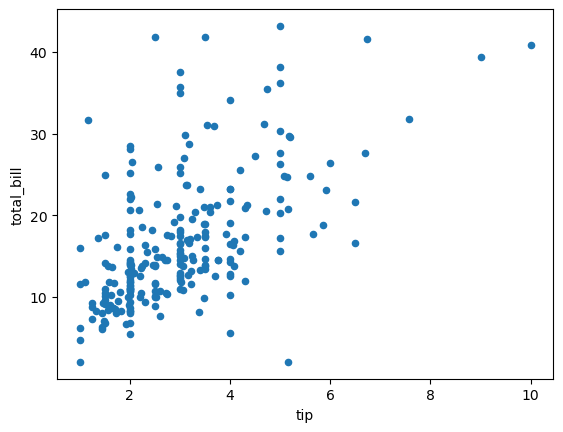

In [94]:
df.plot.scatter('tip','total_bill');

## Varsayımlar
### normal mi, normallik varsayımı shapiro !! 

In [95]:
from scipy.stats import shapiro

In [96]:
shapiro(df.tip)

ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12)

In [98]:
shapiro(df.total_bill)

ShapiroResult(statistic=0.9135653972625732, pvalue=1.1060685700670092e-10)

### ikisi için de p val- 0.05 den oldukça küçük yani H0 Red edilenilir. o bakımdan dağılımlar Normal değildir.

# Hipotez testi
## Korelasyon katsayısı:

In [100]:
df.tip.corr(df.total_bill) 
# öntanımlı olarak pearson korelasyon katsayısını verir. ancak perason, normallik varsayımı geçerli olduğunda hesaplanır. Bu verilerde sağlanmıyordu ! 

0.5766634471096382

In [103]:
df.tip.corr(df.total_bill,method='spearman') ## normallik varsayımı sağlanmadığında, Spearman methodu ile hesaplarız.


0.593691939408997

* değişkenler arasında pozitif yönlü bir ilişki var.
* ilişkinin yönü + 0.60 civarında, ORTA ŞİDDETTLİ 

## Korelasyonun anlamlılık testi

In [105]:
from scipy.stats.stats import pearsonr

C:\Users\ycanf\AppData\Local\Temp\ipykernel_16548\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [108]:
pearsonr(df.tip,df.total_bill) ##p-val 0,05 den küçük yani h0 red edilir, yani değişkenler arasında anlamlı bir ilişki yoktur hipotezini red ediyoruz


PearsonRResult(statistic=0.5766634471096377, pvalue=5.018290084948936e-23)

# Nonparametrik Korelasyon Hipotez Testi 

In [116]:
from scipy.stats import stats
stats.spearmanr(df.tip,df.total_bill) 
# p-val 0,05 den küçüktür, yani H0 red edilir, Değişkenler arasında bir ilişki vardır, bu ilişki orta şiddetli anlamlı pozitif yönlü bir ilişkidir.

C:\Users\ycanf\AppData\Local\Temp\ipykernel_16548\3441001614.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(df.tip,df.total_bill)


SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

In [118]:
stats.kendalltau(df.tip,df.total_bill) # p-val 0,05 den küçüktür, yani H0 red edilir, Değişkenler arasında bir ilişki vardır, bu ilişki anlamlı pozitif yönlü bir ilişkidir.

C:\Users\ycanf\AppData\Local\Temp\ipykernel_16548\73826279.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.kendalltau(df.tip,df.total_bill) # p-val 0,05 den küçüktür, yani H0 red edilir, Değişkenler arasında bir ilişki vardır, bu ilişki anlamlı pozitif yönlü bir ilişkidir.


SignificanceResult(statistic=0.4400790074919885, pvalue=7.131027725873621e-24)